In [40]:
import pandas as pd

df = pd.read_csv("data/clean_data.csv")
df.drop(["Unnamed: 0"], axis=1, inplace=True)

In [41]:
pop_gdp = [
 'population_WDI',
 'GDP',
 ]
migr = [
 'net_migration',
]
ind = [
 'human_capital_index',
 'school_enroll_secondary_gpi',
]

life = [
    'life_expectancy',
    'infant_mortality_rate',
    ]

pct = [
 'internet_users_pct',
 'urban_population_pct',
 'female_population_pct',
 'male_population_pct'
]

In [42]:
import matplotlib.pyplot as plt

def pct_subplot(ax, fig, column_names, df, country_name):
    country = df[df["name"] == country_name].sort_values("year")

    # Plot each column
    for col in column_names:
        ax.plot(country["year"], country[col], label=col.replace("_", " ").title())

    ax.set_title(f"{country_name} — Percentage Indicators", fontsize=11)
    ax.set_ylabel("Percent (%)")
    ax.set_xlabel("Year")
    ax.legend(fontsize=8)
    ax.grid(True, linestyle="--", alpha=0.6)
    ax.set_ylim(0, 100)

def ind_subplot(ax, fig, column_names, df, country_name):
    # Filter data
    country = df[df["name"] == country_name].sort_values("year")

    hci_col, enroll_col = column_names

    # Plot both indicators
    ax.plot(country["year"], country[hci_col], label="Human Capital Index", color="tab:purple", linewidth=2)
    ax.plot(country["year"], country[enroll_col], label="School Enroll (Secondary GPI)", color="tab:orange", linewidth=2, linestyle="--")

    # Titles and labels
    ax.set_title(f"{country_name} — Human Capital & Education", fontsize=11)
    ax.set_ylabel("Index / Ratio")
    ax.set_xlabel("Year")
    ax.legend(fontsize=8)
    ax.grid(True, linestyle="--", alpha=0.6)
    ax.set_ylim(0, 1.5)

In [51]:
def migr_subplot(ax, fig, column_names, df, country_name):
    """
    Plot net migration for a given country on its own subplot.

    Parameters
    ----------
    ax : matplotlib.axes.Axes
        Axis from subplot grid.
    fig : matplotlib.figure.Figure
        Parent figure.
    column_names : list
        ['net_migration']
    df : pandas.DataFrame
        Full dataset.
    country_name : str
        Country name to filter.
    """
    # Filter and sort
    country = df[df["name"] == country_name].sort_values("year")
    mig_col = column_names[0]

    # Plot net migration (in thousands)
    ax.plot(
        country["year"],
        country[mig_col] / 1e3,
        color="tab:red",
        linewidth=2,
        label="Net Migration (thousands)",
    )

    # Add dotted midline at 0 (neutral migration)
    ax.axhline(0, color="gray", linestyle=":", linewidth=1)

    # Titles and labels
    ax.set_title(f"{country_name} — Net Migration", fontsize=11)
    ax.set_ylabel("Net Migration (thousands)")
    ax.set_xlabel("Year")
    ax.legend(fontsize=8)
    ax.grid(True, linestyle="--", alpha=0.6)

    # Auto-scale to symmetric range around 0
    y_max = max(abs(country[mig_col] / 1e3).max(), 1)
    ax.set_ylim(-y_max * 1.1, y_max * 1.1)


In [46]:
def life_subplot(ax, fig, column_names, df, country_name):
    """
    Plot life expectancy and infant mortality rate for a given country
    using dual y-axes (left: life expectancy, right: infant mortality rate).

    Parameters
    ----------
    ax : matplotlib.axes.Axes
        Axis to plot on (from subplot grid).
    fig : matplotlib.figure.Figure
        Parent figure.
    column_names : list
        ['life_expectancy', 'infant_mortality_rate']
    df : pandas.DataFrame
        Full dataset.
    country_name : str
        Country to filter.
    """
    # Filter and sort
    country = df[df["name"] == country_name].sort_values("year")

    life_col, imr_col = column_names

    # --- Left axis: Life expectancy ---
    color_life = "tab:blue"
    ax.plot(
        country["year"],
        country[life_col],
        color=color_life,
        linewidth=2,
        label="Life Expectancy (years)",
    )
    ax.set_ylabel("Life Expectancy (years)", color=color_life)
    ax.tick_params(axis="y", labelcolor=color_life)
    ax.grid(True, linestyle="--", alpha=0.6)
    ax.set_title(f"{country_name} — Life Expectancy & Infant Mortality", fontsize=11)

    # --- Right axis: Infant mortality rate ---
    ax2 = ax.twinx()
    color_imr = "tab:red"
    ax2.plot(
        country["year"],
        country[imr_col],
        color=color_imr,
        linewidth=2,
        linestyle="--",
        label="Infant Mortality Rate (per 1,000 births)",
    )

    # Normal positive y-scale (not inverted)
    ax2.set_ylim(0, country[imr_col].max() * 1.1)

    ax2.set_ylabel("Infant Mortality Rate (per 1,000 births)", color=color_imr)
    ax2.tick_params(axis="y", labelcolor=color_imr)

    # --- Combine legends from both axes ---
    lines, labels = ax.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax.legend(lines + lines2, labels + labels2, loc="upper left", fontsize=8)


In [44]:
def pop_gdp_subplot(ax, fig, column_names, df, country_name):
    """
    Plot population and GDP per capita for a given country on one subplot
    using dual y-axes.

    Parameters
    ----------
    ax : matplotlib.axes.Axes
        Axis to plot on (from a subplot grid).
    fig : matplotlib.figure.Figure
        The parent figure.
    column_names : list
        ['population_WDI', 'GDP'] — population and GDP columns.
    df : pandas.DataFrame
        The full dataset.
    country_name : str
        Country name to filter.
    """
    # Filter and sort data
    country = df[df["name"] == country_name].sort_values("year")

    pop_col, gdp_col = column_names

    # Left y-axis: population (millions)
    color_pop = "tab:blue"
    ax.plot(country["year"], country[pop_col] / 1e6, color=color_pop, linewidth=2, label="Population (millions)")
    ax.set_ylabel("Population (millions)", color=color_pop)
    ax.tick_params(axis="y", labelcolor=color_pop)
    ax.set_title(f"{country_name} — Population & GDP per Capita", fontsize=11)
    ax.grid(True, linestyle="--", alpha=0.6)

    # Right y-axis: GDP per capita
    ax2 = ax.twinx()
    color_gdp = "tab:green"
    ax2.plot(country["year"], country[gdp_col], color=color_gdp, linewidth=2, linestyle="--", label="GDP per capita (USD)")
    ax2.set_ylabel("GDP per capita (USD)", color=color_gdp)
    ax2.tick_params(axis="y", labelcolor=color_gdp)

    # Combine legends from both axes
    lines, labels = ax.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax.legend(lines + lines2, labels + labels2, loc="upper left", fontsize=8)


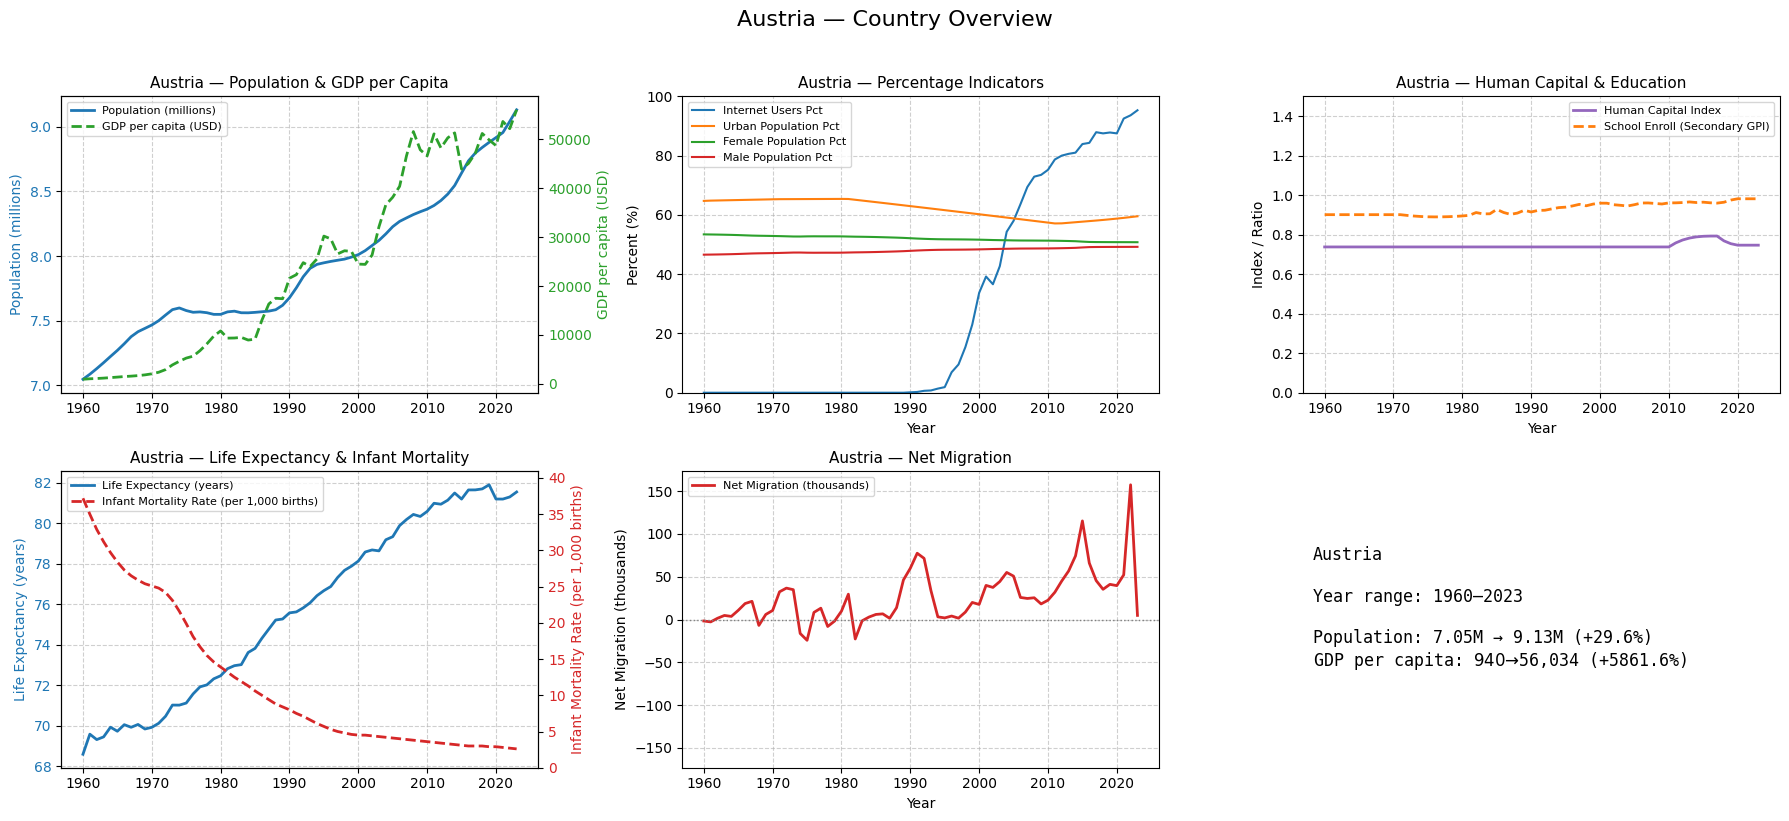

In [56]:
import matplotlib.pyplot as plt

def plot_country(name):
    # Grid configuration
    nrows, ncols = 2, 3
    fig, axes = plt.subplots(nrows, ncols, figsize=(ncols * 6, nrows * 4))
    axes = axes.flatten()  # flatten into 1D list for easier indexing

    # --- Individual subplots ---
    pop_gdp_subplot(axes[0], fig, pop_gdp, df, name)
    pct_subplot(axes[1], fig, pct, df, name)
    ind_subplot(axes[2], fig, ind, df, name)
    life_subplot(axes[3], fig, life, df, name)
    migr_subplot(axes[4], fig, migr, df, name)

    # --- Summary box (last subplot) ---
    country = df[df["name"] == name].sort_values("year")
    start_year, end_year = int(country["year"].min()), int(country["year"].max())

    # Compute summary stats
    pop_start, pop_end = country["population_WDI"].iloc[0], country["population_WDI"].iloc[-1]
    gdp_start, gdp_end = country["GDP"].iloc[0], country["GDP"].iloc[-1]

    pop_diff = pop_end - pop_start
    pop_change_pct = (pop_diff / pop_start) * 100
    gdp_diff = gdp_end - gdp_start
    gdp_change_pct = (gdp_diff / gdp_start) * 100

    # Prepare text
    text = (
        f"{name}\n\n"
        f"Year range: {start_year}–{end_year}\n\n"
        f"Population: {pop_start/1e6:.2f}M → {pop_end/1e6:.2f}M "
        f"({pop_change_pct:+.1f}%)\n"
        f"GDP per capita: ${gdp_start:,.0f} → ${gdp_end:,.0f} "
        f"({gdp_change_pct:+.1f}%)\n"
    )

    # Display text summary
    ax = axes[5]
    ax.axis("off")
    ax.text(0.02, 0.5, text, fontsize=12, va="center", ha="left", family="monospace")

    # --- Overall formatting ---
    fig.suptitle(f"{name} — Country Overview", fontsize=16, y=1.02)
    plt.tight_layout()
    plt.show()

plot_country("Austria")
